In [1]:
%load_ext autoreload
%autoreload 2

%load_ext line_profiler

#%% Change working directory from the workspace root to the ipynb file location. Turn this addition off with the DataSciece.changeDirOnImportExport setting
import os
try:
    os.chdir(r'C:\Users\kevin\Documents\Workspace\psylit-experiments\src')
    print("Changed cwd:", os.getcwd())
except:
    print("cwd:", os.getcwd())

Changed cwd: C:\Users\kevin\Documents\Workspace\psylit-experiments\src


In [2]:
from IPython.display import display, Markdown, Latex
from collections import *
from statistics import mean
from functools import *
from os import linesep as EOL
from itertools import *
import re
import json
import pathlib
import glob
import math

import spacy
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import networkx as nx
import plotly as py

from models.cascades import *
from viz.cascades import *
from utils.misc import progress

py.offline.init_notebook_mode()
np.random.seed(0)

ModuleNotFoundError: No module named 'models'

In [3]:
plt.rcParams['figure.figsize'] = 16,10

In [4]:
from experiments.transfer_entropy import TransferEntropy_StimulusResponse as Experiment
ROOT = pathlib.Path().resolve()
DATA_ROOT = ROOT.parent  / 'data' / 'analytics'
print(ROOT)
print(DATA_ROOT)

Experiment.clear_missing_results(DATA_ROOT)

C:\Users\kevin\Documents\Workspace\psylit-experiments\src
C:\Users\kevin\Documents\Workspace\psylit-experiments\data\analytics


In [5]:
TFR_ENT = '$T^(k)$'#'$T^{(k)}$'
TFR_EXCESS = '$\eta_T^{(k)}$'
TFR_RATE = '$t^{(k)}$'

In [22]:
results = Experiment.load_all_results(DATA_ROOT, run_col_name='Document')
results = results['persubj']
#results = results.assign(Subject=np.random.choice(['Foo','Bar'], size=(len(results.index),))).set_index('Subject', append=True)
results.head()

,,Source,Target,apparent_te,apparent_te_p_value
,Document,,,,
0,"EN_1859_Dickens,Charles_ATaleofTwoCities_Novel","('Other', 'Unknown')","('Other', 'Unknown')",0.000000,1.00
1,"EN_1859_Dickens,Charles_ATaleofTwoCities_Novel","('Other', 'Unknown')","('Response', 'Anger')",0.000026,0.89
2,"EN_1859_Dickens,Charles_ATaleofTwoCities_Novel","('Other', 'Unknown')","('Response', 'Anticipation')",0.000179,0.35
3,"EN_1859_Dickens,Charles_ATaleofTwoCities_Novel","('Other', 'Unknown')","('Response', 'Arousal')",0.000790,0.47
4,"EN_1859_Dickens,Charles_ATaleofTwoCities_Novel","('Other', 'Unknown')","('Response', 'Disgust')",0.000074,0.26


In [75]:
df = results#.droplevel(0).set_index(['Subject'], append=True)
#df.droplevel(0).set_index(pd.MultiIndex.from_tuples(df.Source.values), append=True)
df_avg = df.groupby(['Source', 'Target']).mean().reset_index()
#df_avg = df_avg[df_avg.apparent_te_p_value < 0.05]
T = df_avg.pivot(index='Source', columns='Target', values=['apparent_te']).apparent_te
Tp = df_avg.pivot(index='Source', columns='Target', values=['apparent_te_p_value']).apparent_te_p_value

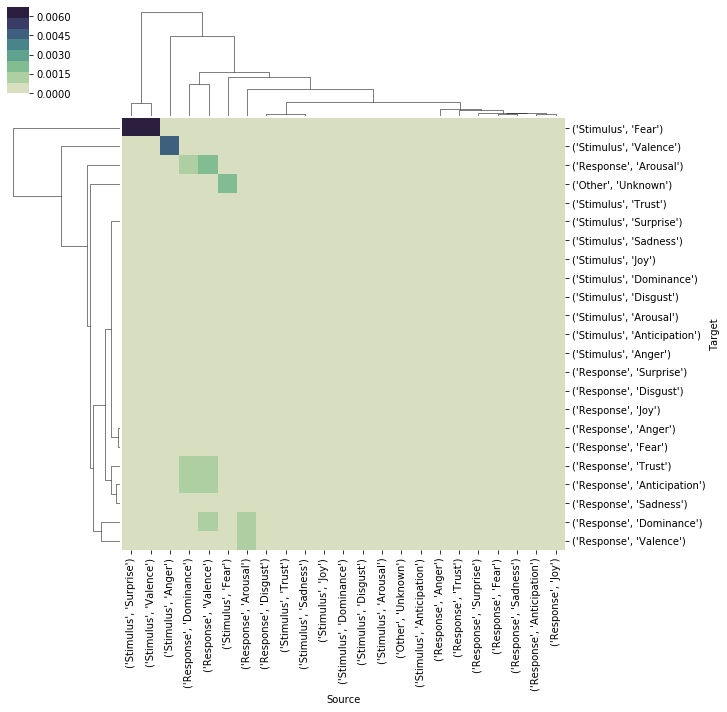

In [76]:
Tp_sgft = (Tp < .05)

#sns.clustermap(Tp[Tp_sgft], annot=False, metric='cosine')#(T - T.T), fmt="d")

sns.clustermap(T[Tp_sgft].T.fillna(0), annot=False, cmap=sns.cubehelix_palette(8, start=.5, rot=-.75))#, metric='cosine')#(T - T.T), fmt="d")

FloatingPointError: NaN dissimilarity value.

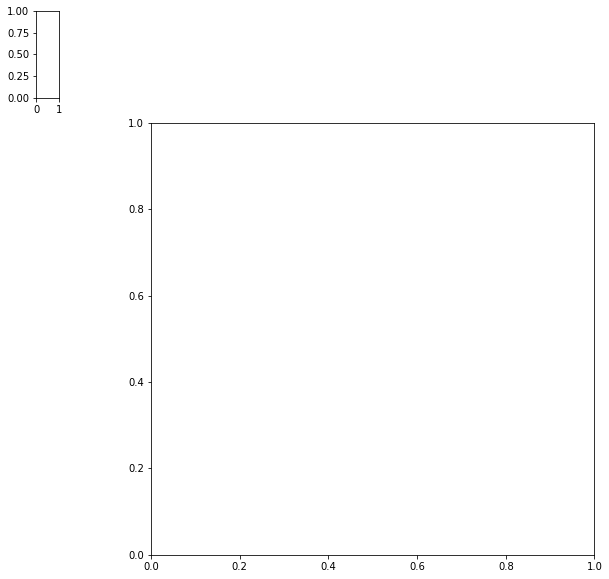

In [74]:
sns.clustermap((T - T.T), annot=False, cmap='RdBu', metric='cosine')#(T - T.T), fmt="d")

In [130]:
mcsr.casc[[('Stimulus','Fear')]].to_numpy()

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int8)

In [108]:
fmt_node = lambda cat, feat: f"{feat.upper()}\n({cat.lower()})"
edges = [
    (fmt_node(*eval(x.Source)), fmt_node(*eval(x.Target)), x.apparent_te) 
    for x in df_avg[df_avg.apparent_te_p_value < 0.05].itertuples()
]
G = nx.DiGraph()
G.add_weighted_edges_from(edges)

TypeError: float() argument must be a string or a number, not 'tuple'

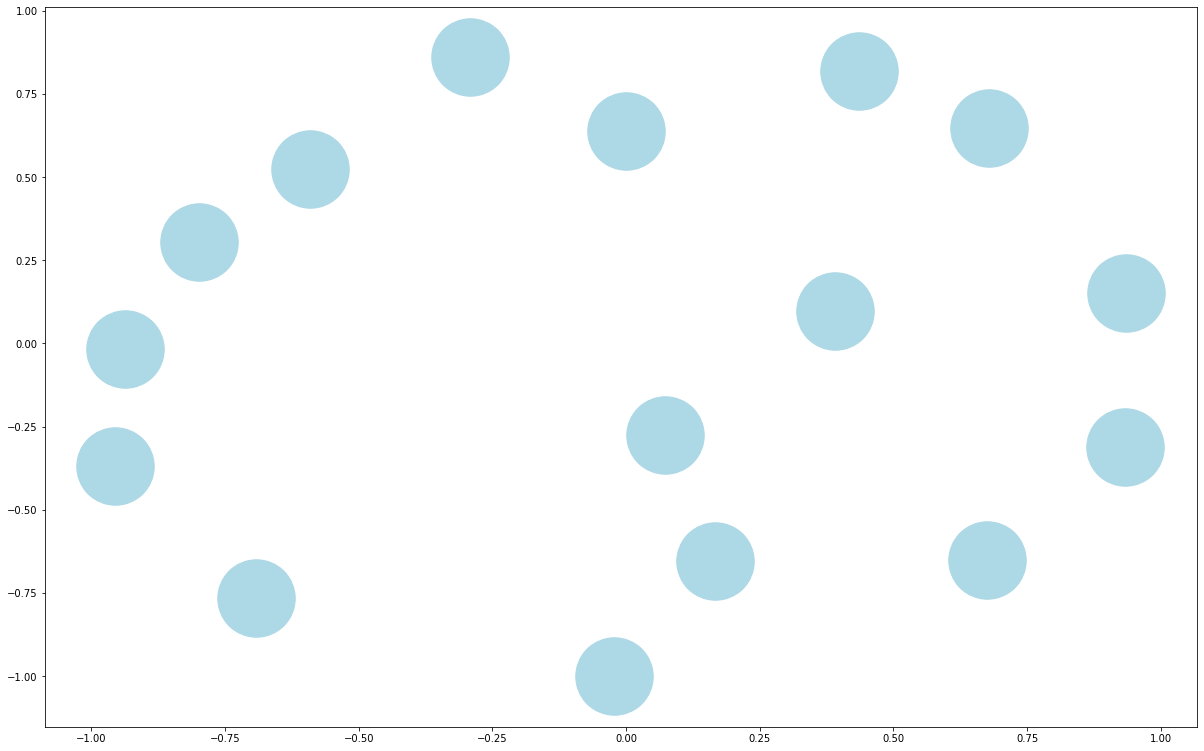

In [116]:
nx.drawing.nx_pylab.draw_spring(G, arrows=True, arrow_size=160, 
                                with_labels=True, node_size=6000, 
                                node_color='lightblue', #edge_cmap=sns.cubehelix_palette(8, start=.5, rot=-.75), 
                                edge_color=nx.get_edge_attributes(G, 'weight'))

In [ ]:
df = results.droplevel(0).set_index(['Subject'], append=True
                                    
df[ENT_RATE] = df[BLOCK_ENT] / df['k']
df[EXCESS_ENT] = df[BLOCK_ENT] - df['k'] * df[ENT_RATE]
#df['n'] = df.groupby(level=[0,1]).size().reset_index()
m = 2
alp_len = 2**m
log_alp_len = math.log(alp_len, 2)
left=n * df[BLOCK_ENT]
right=df.k * alp_len ** df.k * log_alp_len

df = df.assign(
    n=n,
    reliability=left.ge(right).replace({True: 'Reliable', False: 'Unreliable'}).astype('category'),
)
reliable = df.reliability == 'Reliable'
df.head()

In [8]:
from models.cascades import MultiCascades, FEATURE_TRANSFORMERS
from utils.io import file_parts

CASC_ROOT = ROOT.parent / 'data' / 'processed' / 'train'
casc_files = list(CASC_ROOT.glob('**/*.csv*'))
print(len(casc_files), 'cascade files')
docs = set(df.index.get_level_values('Document').unique())
print(len(docs), 'docs')
casc_files = [p for p in casc_files if file_parts(p)[0] in docs]
mc = MultiCascades.from_csvs(casc_files, document_col='Document')
transform_function = FEATURE_TRANSFORMERS['StimulusResponse']
mcsr = transform_function(mc)
mcsr

150 cascade files
1 docs


Category                                                              Other  \
Feature                                                             Unknown   
Subject       t      Document                                                 
NARRATOR      1      EN_1859_Dickens,Charles_ATaleofTwoCities_Novel       0   
              3      EN_1859_Dickens,Charles_ATaleofTwoCities_Novel       0   
              7      EN_1859_Dickens,Charles_ATaleofTwoCities_Novel       0   
              17     EN_1859_Dickens,Charles_ATaleofTwoCities_Novel       0   
              20     EN_1859_Dickens,Charles_ATaleofTwoCities_Novel       0   
...                                                                     ...   
sydney carton 160010 EN_1859_Dickens,Charles_ATaleofTwoCities_Novel       0   
              160016 EN_1859_Dickens,Charles_ATaleofTwoCities_Novel       0   
              160019 EN_1859_Dickens,Charles_ATaleofTwoCities_Novel       0   
              160028 EN_1859_Dickens,Charles_ATaleofTwoCities_Novel       0   
              160034 EN_1859_Dickens,Charles_ATaleofTwoCities_Novel       0   

Category                                                            Response  \
Feature                                                                Anger   
Subject       t      Document                                                  
NARRATOR      1      EN_1859_Dickens,Charles_ATaleofTwoCities_Novel        0   
              3      EN_1859_Dickens,Charles_ATaleofTwoCities_Novel        0   
              7      EN_1859_Dickens,Charles_ATaleofTwoCities_Novel        0   
              17     EN_1859_Dickens,Charles_ATaleofTwoCities_Novel        0   
              20     EN_1859_Dickens,Charles_ATaleofTwoCities_Novel        0   
...                                                                      ...   
sydney carton 160010 EN_1859_Dickens,Charles_ATaleofTwoCities_Novel        0   
              160016 EN_1859_Dickens,Charles_ATaleofTwoCities_Novel        0   
              160019 EN_1859_Dickens,Charles_ATaleofTwoCities_Novel        0   
              160028 EN_1859_Dickens,Charles_ATaleofTwoCities_Novel        0   
              160034 EN_1859_Dickens,Charles_ATaleofTwoCities_Novel        0   

Category                                                                          \
Feature                                                             Anticipation   
Subject       t      Document                                                      
NARRATOR      1      EN_1859_Dickens,Charles_ATaleofTwoCities_Novel            0   
              3      EN_1859_Dickens,Charles_ATaleofTwoCities_Novel            0   
              7      EN_1859_Dickens,Charles_ATaleofTwoCities_Novel            0   
              17     EN_1859_Dickens,Charles_ATaleofTwoCities_Novel            0   
              20     EN_1859_Dickens,Charles_ATaleofTwoCities_Novel            0   
...                                                                          ...   
sydney carton 160010 EN_1859_Dickens,Charles_ATaleofTwoCities_Novel            0   
              160016 EN_1859_Dickens,Charles_ATaleofTwoCities_Novel            0   
              160019 EN_1859_Dickens,Charles_ATaleofTwoCities_Novel            0   
              160028 EN_1859_Dickens,Charles_ATaleofTwoCities_Novel            0   
              160034 EN_1859_Dickens,Charles_ATaleofTwoCities_Novel            0   

Category                                                                     \
Feature                                                             Arousal   
Subject       t      Document                                                 
NARRATOR      1      EN_1859_Dickens,Charles_ATaleofTwoCities_Novel       0   
              3      EN_1859_Dickens,Charles_ATaleofTwoCities_Novel       0   
              7      EN_1859_Dickens,Charles_ATaleofTwoCities_Novel       0   
              17     EN_1859_Dickens,Charles_ATaleofTwoCities_Novel       0   
              20     EN_1859_Dickens,Charl

In [12]:
display(Markdown("""## Average frequency per sample"""))
print(f"{len(mcsr.subjects)} subjects")
print(f"{mcsr.n_rows} data points ({mcsr.n_rows / len(mcsr.subjects)} / subject)")

subjects = mcsr.casc.groupby(level=['Document', 'Subject'])
freq = subjects.sum()
freq.mean()

## Average frequency per sample

12 subjects
286392 data points (23866.0 / subject)


Category  Feature     
Other     Unknown           678.000000
Response  Anger              19.083333
          Anticipation       31.333333
          Arousal           115.083333
          Disgust            10.166667
          Dominance         209.250000
          Fear               25.083333
          Joy                25.750000
          Sadness            23.083333
          Surprise           18.916667
          Trust              40.916667
          Valence           253.750000
Stimulus  Anger            2418.000000
          Anticipation     3367.000000
          Arousal         11122.833333
          Disgust          1618.000000
          Dominance       17987.750000
          Fear             2970.000000
          Joy              2447.000000
          Sadness          2750.000000
          Surprise         1896.000000
          Trust            4045.750000
          Valence         21659.416667
dtype: float64

In [9]:
from models.info_dynamics import apparent_tfr_entropy
narr_twocities = mcsr.casc.droplevel('t').loc[('NARRATOR', 'EN_1859_Dickens,Charles_ATaleofTwoCities_Novel'),:]
r = apparent_tfr_entropy(narr_twocities, ('Stimulus', 'Valence'), ('Response', 'Valence'), k=20)
r

{'apparent_te': 0.0033839267975442765, 'apparent_te_p_value': 0.42}

In [20]:
mcsr.casc[('Other', 'Unknown')].to_numpy()

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [ ]:
##### SNIPPETS

## int to str/categorical
casc.casc.replace({0:'0',1:'1'}).astype('str')#.astype('category')

## group cascades into symbols
def casc_to_str_seq(casc):
    return pd.Series([
        ''.join(map(str, t))
        for t in casc.replace({0:'0',1:'1'}).astype('str').itertuples(index=False)
    ], index=casc.index)
symb = casc.casc.groupby(level='Subject', group_keys=False).apply(casc_to_str_seq)
symb_int = symb.astype('category').cat.codes#.T['NARRATOR','4']

## generate multiple initial conditions
all_series = np.array([casc.casc.to_numpy() for lbl, g in symb_int.groupby(level='Subject', group_keys=False)])
all_series.shape
pd.Series(series).value_counts()

In [ ]:
from pyinform import transferentropy as te

def transfer_entropies(casc, source_cols=None, destination_cols=None, traj_col=None, **kwargs):
    all_cols = list(casc.columns)
    source_cols = source_cols or all_cols
    destination_cols = destination_cols or all_cols
    
    rows = []
    for sc in source_cols:
        row = {'source': sc, 
               **{dc:te.transfer_entropy(casc[sc], casc[dc], **kwargs) for dc in destination_cols }}
        rows.append(row)
    df = pd.DataFrame(rows)
    df.set_index('source', inplace=True, verify_integrity=True)
    return df


k = 1
T = transfer_entropies(casc.casc, k=k)
T

In [ ]:
casc = pairs_casc.copy()
response_ident = 'Agent Subject'
stim_prefix = "[S] "
resp_prefix = "[R] "
new_names = {
    c: resp_prefix+c.replace(response_ident, '') if c.startswith(response_ident) else stim_prefix+c 
    for c in casc.columns
}
casc.rename(index=str, columns=new_names, inplace=True)
stim_cols = [c for c in casc.columns if c.startswith(stim_prefix)]
resp_cols = [c for c in casc.columns if c.startswith(resp_prefix)]
#casc.columns = pd.MultiIndex.from_tuples(
#    tuple([('Response' if c.startswith('Agent Subject') else 'Stimulus'), *c.split()][::-1])
#    for c in casc.columns
#)
#casc.T.groupby(level=[3,0]).any().astype(int).T


In [ ]:
import plotly as py
import plotly.graph_objs as go

def get_traces(casc):
    ent_casc_cols = [c for c in casc.columns if not c.startswith('L_')]
    for ecol in ent_casc_cols:
        if ecol not in casc.columns:
            print('Ignoring col', ecol)
            continue
        mask = casc[lex_cols][casc[ecol] == 1] == 1
        trace_data = [(c, mask.index[mask[c]]) for c in lex_cols]
        #trace_data = np.array([[v.to_numpy(), [k]*len(v)] for k, v in trace_data.items()])
        #print(trace_data.shape)
        #return trace_data
        x = np.concatenate([idx.to_numpy() for c, idx in trace_data])
        y = np.concatenate([[c]*len(idx)   for c, idx in trace_data])
        yield go.Scattergl({
            "x": x,
            "y": y, 
            "marker": {"opacity": 0.75}, 
            "hoverinfo": "text",
            #"text": txt,
            "mode": "markers", 
            "name": ecol, 
            "type": "scatter"
        })
        
traces = list(get_traces(casc))
layout = {"title": "", 
          "xaxis": {"title": "", }, 
          "yaxis": {"title": ""}}

fig = go.Figure(data=traces)
py.offline.iplot(fig)

In [ ]:
from scipy.stats import ttest_ind
    
ttest_ind(
    casc.loc[casc['patient_subject'] == 1, lex_cols],
    casc[lex_cols].mean(),
    #casc.loc[casc['agent_person'] == 1, lex_cols],
)

In [ ]:
#casc.sum().plot(kind='barh')
sns.barplot(data=casc, x)

In [ ]:
#higher_casc = higher_casc.loc[:, higher_casc.sum() > 15]
casc.sum().sort_values(ascending=False).plot(kind='barh')

In [ ]:
seq_cmap = sns.choose_colorbrewer_palette('sequential')

In [ ]:
import plotly.figure_factory as ff
#x = te_1.index
#y = te_1.destination

#fig = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=z_text)#, colorscale='Viridis')
sns.heatmap(T, annot=False, cmap=seq_cmap, square=True)
plt.title(f"Transfer entropy (global, k={k})")
plt.show()

In [ ]:
#sns.heatmap((T - T.T), annot=False, cmap='RdBu')#, fmt="d")
sns.clustermap((T - T.T), annot=False, cmap='RdBu', metric='cosine')#, fmt="d")

display(Markdown(f"## Directionality (global, k={k}, subject={subject!r}) : positive = driving, negative = driven"))
plt.show()

In [ ]:
T_sumsq = T.apply(lambda x: x.pow(2).sum())
T_mask = T_sumsq > T_sumsq.mean()
T_core = T.loc[T_mask, T_mask]
sns.clustermap((T_core - T_core.T), annot=False, cmap='RdBu', metric='cosine')#, fmt="d")

display(Markdown(f"## Directionality: relevant subset (global, k={k}, subject={subject!r}) : positive = driving, negative = driven"))
plt.show()

In [ ]:
def group_T(T, func, agg='sum', col_name=None):
    col_name = col_name or agg.title()
    T_core = T.copy().reset_index()
    T_core[col_name] = func(T_core.source)
    T_core = T_core.groupby(col_name).agg(agg)
    T_core = T_core.T.reset_index()
    T_core[col_name] = func(T_core['index'])
    T_core = T_core.groupby(col_name).agg(agg)
    return T_core

In [ ]:
get_ent_role = lambda col: col.str.split(' & ', expand=True)[0]
get_ent = lambda col: col.str.split(' & ', expand=True)[0].str.split('_', expand=True)[1]
get_role = lambda col: col.str.split(' & ', expand=True)[0].str.split('_', expand=True)[0]
get_feat = lambda col: col.str.split(' & ', expand=True)[1]
get_sys = lambda col: np.where(col.str.startswith('[S]'), col, 'Response')#.apply(lambda is_s: [col, 'Response'][is_s]).astype(str) #.str.startswith('Agent Subject').apply(lambda r: ['[Stim] ', '[Resp] '][r]).astype(str) + col.str.split(' & ', expand=True)[1].astype(str)
    #lambda r: ['Stimulus', 'Response'][r[0] == 'agent_subject'] + ' ' + r[1])

def grouped_transfer_entropy_plot(T, T_group_func, grouping_title):
    title = (f"Directionality {grouping_title} (global, k={k}, subject={subject!r}) : positive = driving, negative = driven")
    display(Markdown(f"## {title}"))
    T_core = group_T(T, T_group_func, agg='mean')
    
    # Generate a mask for the upper triangle
    mask = np.zeros_like(T_core, dtype=np.bool)
    mask[np.triu_indices_from(mask, +1)] = True
    
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    
    g = sns.heatmap((T_core), annot=False, cmap=cmap, mask=mask, square=True, linewidths=.6)
    #g = sns.clustermap((T_core), annot=False, cmap=cmap, mask=mask, metric='cosine', square=True)
    plt.show()

grouped_transfer_entropy_plot(T, get_sys, "per system")
#grouped_transfer_entropy_plot(T, get_ent, "per entity")
#grouped_transfer_entropy_plot(T, get_role, "per role")
#grouped_transfer_entropy_plot(T, get_ent_role, "per entity and role")
#grouped_transfer_entropy_plot(T, get_feat, "per feature")


In [ ]:
from pyinform import blockentropy as be
def get_block_entropies(casc, cols, kmax=10):
    n = len(casc.index)
    
    data = []
    for k in range(1, kmax):
        for c in cols:
            benk = be.block_entropy(casc[c], k=k)
            data.append({'k': k, 'cascade': c, 'block_entropy_k': benk})
    
    return pd.DataFrame(data)

block_entrs = get_block_entropies(higher_casc, all_cols, kmax=30)

In [ ]:
#sns.lineplot(data=block_entrs, x='k', y='block_entropy_k', hue='cascade')
#plt.show()

In [ ]:
block_entrs['block_entropy_k_diff'] = block_entrs.block_entropy_k.diff()
block_entrs[['ent_role','feat']] = block_entrs.cascade.str.split(' & ',expand=True)
block_entrs[['role','entity']] = block_entrs.ent_role.str.split('_',expand=True)
block_entrs['block_entropy_k_ratio'] = block_entrs.block_entropy_k / block_entrs.k
block_entrs['block_entropy_k_ratio_diff'] = block_entrs['block_entropy_k_ratio'].diff()
#block_entrs['f'] = block_entrs.cascade.str.split(' & ')[1]

In [ ]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
sns.lineplot(data=block_entrs, x='k', y='block_entropy_k', hue='ent', ax=axes[0][0])
sns.lineplot(data=block_entrs, x='k', y='block_entropy_k', hue='role', ax=axes[0][1])
sns.lineplot(data=block_entrs, x='k', y='block_entropy_k', hue='ent_role', ax=axes[1][0])
sns.lineplot(data=block_entrs, x='k', y='block_entropy_k', hue='feat', ax=axes[1][1])
fig.suptitle('Block entropy vs history length')
plt.show()

In [ ]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
sns.lineplot(data=block_entrs, x='k', y='block_entropy_k_ratio', hue='ent', ax=axes[0][0])
sns.lineplot(data=block_entrs, x='k', y='block_entropy_k_ratio', hue='role', ax=axes[0][1])
sns.lineplot(data=block_entrs, x='k', y='block_entropy_k_ratio', hue='ent_role', ax=axes[1][0])
sns.lineplot(data=block_entrs, x='k', y='block_entropy_k_ratio', hue='feat', ax=axes[1][1])
fig.suptitle('Block entropy relative to history length')
plt.show()

In [ ]:
sns.lineplot(data=block_entrs, x='k', y='block_entropy_k_diff', hue='e')
plt.show()

In [ ]:
from pyinform import activeinfo as ai

def get_local_ais(casc, cols, k=10):
    n = len(casc.index)
    m = len(cols)
    t = np.tile(np.arange(n), m)
    
    lbl = np.repeat(np.array(cols), n)
    a = []
    pad_w = k-1
    a_c = np.ones([n]) * np.nan
    for c in cols:
        a_c[:-k] = ai.active_info(casc[c], k=k, local=True).squeeze()
        a.append(a_c)
    a = np.concatenate(a)
    
    df = pd.DataFrame({'ais': a, 'cascade': lbl, 't':t})
    df[['e','f']] = df.cascade.str.split(' & ',expand=True)
    return df

ais = get_local_ais(higher_casc, all_cols, k=11)
ais

In [ ]:
fig = lambda:go.Figure(
    data=[go.Scattergl(
        x=ais.t,
        y=ais.ais,
        marker=dict(color=ais.f),
        #line=dict(color='rgb(0,100,80)'),
        #line=dict(color=color),
        mode='markers',
        name=dict(color=ais.f),
    )],
)
#py.offline.iplot(fig)
#fig, ax = plt.subplots()
sns.scatterplot(data=ais.groupby('t').mean().reset_index(), x='t', y='ais', hue='e', ax=ax)
#py.offline.plot_mpl(fig)
#ais.groupby('e',.rolling(20, by='t').agg(['mean','min','max'])

In [ ]:
from plotly.colors import DEFAULT_PLOTLY_COLORS
#sns.lineplot(data=ais[ais.t < 200], x='t', y='ais', hue='e')
#plt.show()
ais_ts = ais.groupby('f').rolling(5).agg(['mean', 'min', 'max'])

def filled_plot(data, x, y, group, rolling_size=20, **kwargs):
    
    
    X = data.groupby(group)
    X = X.rolling(rolling_size, on=x)
    X = X.agg({y:['mean', 'min', 'max']})
    X.columns = X.columns.to_flat_index()
    #X.reset_index(level=['e','f'])
    
    
    
    data = [
        p
        for (gname, gframe), color in zip(X.groupby(group), DEFAULT_PLOTLY_COLORS)
        for p in filled_line(gframe, name=gname, color=color)
    ]       
    
    
    #X = X.unstack(['e','f'])
    #X.loc[('agent_environment','L_NRCw_Em_negative'),[('ais','mean')]]
    
    grouped = data.groupby(group)
    rolled = grouped.rolling(rolling_size)
    agg = rolled.agg({'t': 'mean', 'ais':['mean', 'min', 'max']})
    agg.columns = agg.columns.to_flat_index()
    
    trend = agg['ais', 'mean']
    x = agg['t', 'mean']
    x_rev = x.iloc[::-1]
    y = ['ais', 'mean']
    y_lb = ['ais', 'min']
    y_ub = ['ais', 'max']
    
    def filled_line(frame, color, name=None, **kwargs):
        
        filled = lambda:go.Scattergl(
            x=x + x.iloc[::-1],
            y=pd.concat([y['min'], y['max']]),
            fill='tozerox',
            fillcolor=color,
            #line=dict(color='rgba(255,255,255,0)'),
            #showlegend=False,
            opacity=0.2,
            name=name,
            **kwargs,
        )
        return [
            #filled,
            go.Scattergl(
                x=x,
                y=y['mean'],
                #line=dict(color='rgb(0,100,80)'),
                line=dict(color=color),
                mode='lines',
                name=name,
                **kwargs,
            ),
        ] 
    
    return go.Figure(
        #data=data,
        #layout=layout,
        data=[
            p
            for (gname, gframe, win_), color in zip(grouped, DEFAULT_PLOTLY_COLORS)
            for p in filled_line(gframe, x=x, y=y, name=gname, color=color)
        ]
    )
    
#fig = filled_plot(ais_ts, x='t', y='ais', group='cascade')

#fig = filled_plot(data=ais[ais.t < 200], x='t', y='ais', group='cascade')
#py.offline.iplot(fig)
#for gn, gf in 
#sns.lineplot(data=ais.rolling(20).mean(), x='t', y='ais', hue='e')
#plt.show()
#sns..plot(x='t', y='ais',kind='line')

rolling_size = 20
grouped = ais.groupby(['e','f'])
rolled = grouped.rolling(rolling_size)
trend = rolled['ais'].mean()
x = rolled['t'].mean()
x_rev = x.iloc[::-1]

In [ ]:
X = ais.groupby(['e','f'])
#X = X.reset_index()
X = X.rolling(20, on='t')
trend = X.ais.mean()
X = X.agg({'ais':['mean', 'min', 'max']})
X.columns = X.columns.to_flat_index()
X.apply(lambda s: s - trend, axis='columns')
#X = X.unstack(['e','f'])
#X.loc[:,[('ais','mean')]]
#X.reset_index(level)
##['t','mean']
#X['agent_environment', 'L_NRCw_Em_negative']['t','mean']
#g = grouped.rolling(20)
#g.index[:2]#e, f, win = g.index
#g['t','mean']['patient_person', 'L_NRCw_Em_trust']#[['t','mean']]#,'ais']
#for k,x in g.iterrows():
#    print(k,x)
    #print(gf.describe())
#for x in g[[('t', 'mean'), 'ais']]:
    #print(x)
    #continue
    #print(gn)
    #print(gf[[('t', 'mean'), 'ais']].describe())

In [ ]:
#sns.g
g = grouped.rolling(20)
sns.lineplot(data=g.agg({'t': 'mean', 'ais':['mean', 'min', 'max']}), 
             x=('t', 'mean'), y=('ais', 'mean'), hue=g.index)
plt.show()

In [ ]:
sns.lineplot(data=ais, x='t', y='ais')

In [ ]:
py.offline.plot_mpl?

In [ ]:
spacy.util.minibatch?

In [ ]:
list.pop?

In [ ]:
[].append

In [ ]:
[].push

In [ ]:
[].pop

In [ ]:
import spacy
spacy.__version__

In [ ]:
a = []
a.extend((range(3)))
a.extend((range(4,7)))
print(a)
a.pop(0), a.pop(0), a

In [ ]:
doc

In [ ]:
plt

In [ ]:
"{x} {x[1:]}".format(x="hello")

In [ ]:
import sys
sys.cwd

In [ ]:
x = pd.DataFrame({'a': [0,0,0,1,0,2,0,None], 'b': [0,1,0,None,1,2,0,0]})
x#.loc[1:4,:]

In [ ]:

xx = x.astype(bool) * 1
xx = pd.get_dummies(xx, dummy_na=True)
xx.apply(lambda c:c.astype(bool))

In [ ]:
x.apply(lambda c: c.str)

In [ ]:
ents[entity_not_found]#.mention_root.factorize()

In [ ]:
entity_not_found = ents.entity_i.isna()
ents_fixed = ents.copy()
entity_not_found_ids = -ents[entity_not_found].mention_root.factorize()[0]

ents_fixed.loc[entity_not_found, 'entity_i'] = entity_not_found_ids
ents_fixed.entity_i = ents_fixed.entity_i.astype(np.int32)
ents_fixed

In [ ]:
ents_fixed.groupby(['entity_i', 'entity_root','categ']).categ.count()

In [ ]:
ents[ents.mention_root.str.match('my')]

In [ ]:
ents.apply(lambda c: c.dtype)

In [ ]:
pd.__version__

In [ ]:
block_entropy(np.random.random(100).astype(np.int8) % 10, k=1)
#np.arange(100).dtype

In [ ]:
series = lambda: np.random.randint(2**1, size=30_000)
multi = np.array([series() for _ in range(1)]).astype(np.int16)
print(multi.shape, multi.dtype)
for k in range(1,30):
    print(k, block_entropy(multi, k=k))

In [ ]:
np.random.randint?

In [ ]:
c3.n_rows / len(c3.subjects)

In [ ]:
series().dtype

In [ ]:
with open('..\\list_raw_train.txt') as f:
    raw_files = set(pathlib.Path(x.strip()).stem.split('.')[0] for x in f.readlines())
raw_files

In [ ]:
with open('..\\list_interim_train.txt') as f:
    interim_files = set(pathlib.Path(x.strip()).stem.split('.')[0].split('__')[0] for x in f.readlines())
interim_files

In [ ]:
raw_files - interim_files

In [ ]:
with open('..\\list_processed_train.txt') as f:
    proc_files = set(pathlib.Path(x.strip()).stem.split('.')[0].split('__')[0] for x in f.readlines())
proc_files

In [ ]:
interim_files - proc_files

In [3]:
import pandas as pd
import numpy as np


xs = pd.Series((np.random.random([100]) > .3).astype(np.int8))
fake = pd.DataFrame({
    'X': xs,
    'Y': xs.shift(periods=-1, fill_value=0),
    'Z': xs.shift(periods=-2, fill_value=0),
})
fake.head()

,X,Y,Z
0,1,1,1
1,1,1,1
2,1,1,1
3,1,1,1
4,1,1,0


In [4]:
from models.info_dynamics import cond_tfr_entropy
cte, p = cond_tfr_entropy(fake, 'X', 'Y', k=2)
print('X->Y', cte, p)
cte, p = cond_tfr_entropy(fake, 'Y', 'X', k=2)
print('Y->X', cte, p)

X->Y 0.0 1.0
Y->X 0.8299118255098443 0.0


In [5]:
states = np.random.randint(20, 50, size=[100])
states

array([30, 44, 32, 34, 42, 45, 38, 48, 44, 45, 21, 27, 22, 23, 31, 27, 33,
       40, 46, 38, 38, 30, 20, 27, 46, 28, 40, 37, 38, 30, 20, 32, 47, 49,
       44, 31, 38, 26, 37, 47, 24, 41, 35, 34, 36, 34, 29, 37, 38, 23, 37,
       29, 46, 32, 37, 32, 40, 32, 25, 23, 37, 32, 46, 46, 23, 29, 42, 33,
       35, 29, 29, 41, 42, 29, 39, 47, 21, 40, 41, 43, 49, 49, 39, 46, 41,
       32, 48, 21, 24, 30, 23, 48, 27, 25, 46, 47, 41, 32, 44, 26])

In [10]:
un, inv = np.unique(states, return_inverse=True)

In [11]:
inv

array([10, 24, 12, 14, 22, 25, 18, 28, 24, 25,  1,  7,  2,  3, 11,  7, 13,
       20, 26, 18, 18, 10,  0,  7, 26,  8, 20, 17, 18, 10,  0, 12, 27, 29,
       24, 11, 18,  6, 17, 27,  4, 21, 15, 14, 16, 14,  9, 17, 18,  3, 17,
        9, 26, 12, 17, 12, 20, 12,  5,  3, 17, 12, 26, 26,  3,  9, 22, 13,
       15,  9,  9, 21, 22,  9, 19, 27,  1, 20, 21, 23, 29, 29, 19, 26, 21,
       12, 28,  1,  4, 10,  3, 28,  7,  5, 26, 27, 21, 12, 24,  6],
      dtype=int64)

In [13]:
np.unique(inv)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], dtype=int64)